In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Question 1

In [61]:
data = {'x':[1,2,3,4,5],
       'y':[1,3,3,2,5]}
df = pd.DataFrame(data)
df

,x,y
0,1,1
1,2,3
2,3,3
3,4,2
4,5,5


In [62]:
x = df['x'].values
xf = x.flatten()
y = df['y'].values

In [63]:
learning_rate = 0.1
iter = 20
b0 = 0.1
b1 = 0.01
n = len(y)

In [64]:
errors = []
for i in range(iter) :
    y_pred1 = b0 + b1 * xf
    error = y_pred1-y
    mse = np.mean(error**2)
    errors.append(mse)
    b0 -= learning_rate * (1/n) * np.sum(error)
    b1 -= learning_rate * (1/n) * np.sum(error * xf)

In [65]:
errors

[8.861099999999999,
 1.0753980000000003,
 0.8135703599999999,
 0.8039994648000002,
 0.802911785136,
 0.80213420247648,
 0.8013918606380737,
 0.8006747124778357,
 0.7999816161931619,
 0.7993117555088801,
 0.798664351144222,
 0.798038650265734,
 0.7974339252886613,
 0.7968494730200517,
 0.7962846138406989,
 0.7957386909148493,
 0.7952110694264103,
 0.7947011358407694,
 0.7942082971913538,
 0.7937319803901127]

In [66]:
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 0.7937319803901127, RMSE: 0.8909163711539444


[]

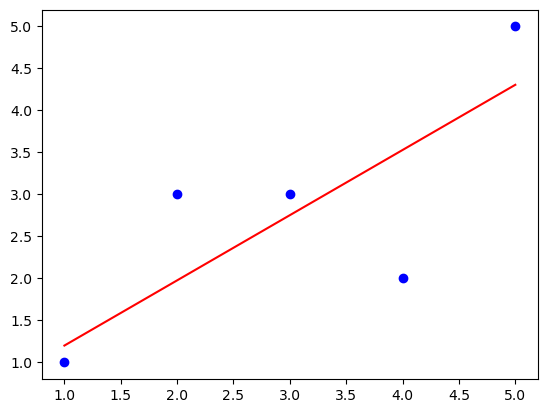

In [67]:
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred1, color='red')
plt.plot()

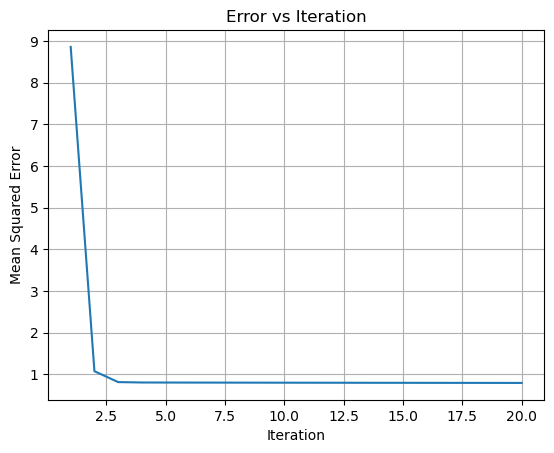

In [68]:
plt.plot(range(1, iter + 1), errors)
plt.title('Error vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.grid()

### Question 3

In [75]:
df3 = pd.read_csv('sal_exp.csv')
df3

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4
5,4.2,2.5
6,4.4,2.8
7,6.1,3.1
8,5.4,3.3
9,5.7,3.7


In [76]:
x3 = df3['salary'].values
y3 = df3['experience'].values
learning_rate = 0.01
iter = 20
b0 = 0.1
b1 = 0.01
n = len(y3)

In [78]:
errors = []
for i in range(iter) :
    y_pred3 = b0 + b1 * x3.flatten()
    error = y_pred3-y3
    mse = np.mean(error**2)
    errors.append(mse)
    b0 -= learning_rate * (1/n) * np.sum(error)
    b1 -= learning_rate * (1/n) * np.sum(error * x3.flatten())

In [79]:
errors

[7.7981875,
 4.787398727768779,
 2.9521236686379875,
 1.8334019051651698,
 1.1514667313707234,
 0.7357818508760925,
 0.482394120719273,
 0.3279372302598174,
 0.2337852254395544,
 0.17639303456553676,
 0.1414083804042382,
 0.1200826014739605,
 0.10708281042270477,
 0.09915825997050164,
 0.09432740481471998,
 0.09138236213630574,
 0.08958684752936928,
 0.08849204698760847,
 0.08782437871147397,
 0.08741707651209467]

[]

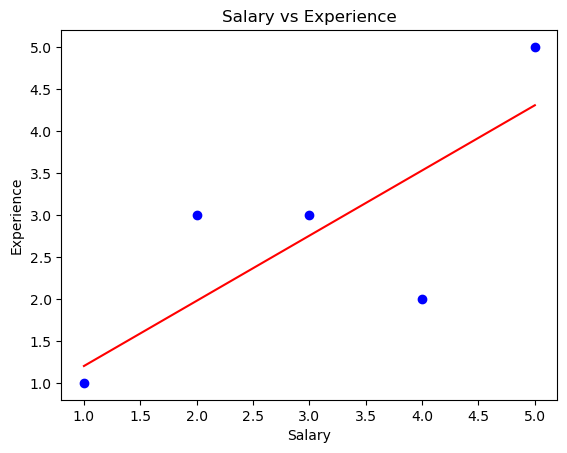

In [80]:
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred1, color='red')
plt.title('Salary vs Experience')
plt.xlabel('Salary')
plt.ylabel('Experience')
plt.plot()

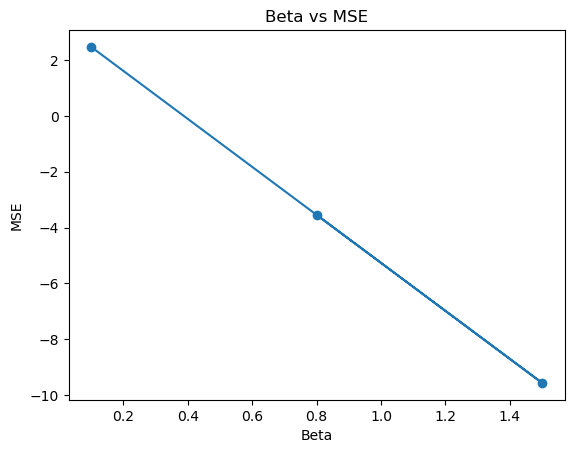

In [82]:
b = 1.1
errors = []
beta_values = [0.1,1.5,0.8]
for beta in beta_values:
    y_pred_ = b + beta*x3.flatten()
    mse = np.mean((y3-y_pred_)*2)
    errors.append(mse)
plt.plot(beta_values,errors)
plt.scatter(beta_values,errors)
plt.title('Beta vs MSE')
plt.xlabel('Beta')
plt.ylabel('MSE')
plt.show()

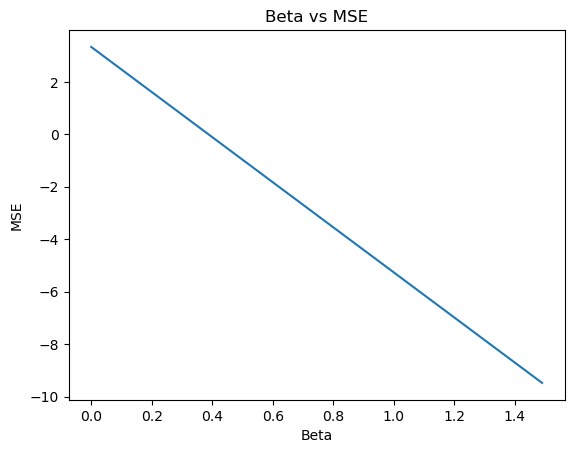

In [87]:
b = 1.1
errors = []
beta_values = np.arange(0,1.5,0.01)
for beta in beta_values:
    y_pred__ = b + beta*x3.flatten()
    mse = np.mean((y3-y_pred__)*2)
    errors.append(mse)
plt.plot(beta_values,errors)
plt.title('Beta vs MSE')
plt.xlabel('Beta')
plt.ylabel('MSE')
plt.show()

### Question 4

In [341]:
data = {'Hours of study': [1, 2, 3, 4, 5, 6, 7, 8],
        'Pass': [0, 0, 0, 0, 1, 1, 1, 1]}
df = pd.DataFrame(data)
x = df[['Hours of study']].values
y = df['Pass'].values

In [353]:
class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, n_iter=60, epochs=5):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.epochs = epochs
        self.b0 = 0
        self.b1 = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m = len(y)
        self.errors = []
        self.slopes = []

        for epoch in range(self.epochs):
            for i in range(m):
                xi = X[i]
                yi = y[i]
                y_pred = self.sigmoid(self.b0 + self.b1 * xi)
                error = y_pred - yi
                grad_b0 = error
                grad_b1 = error * xi
                self.b0 -= self.learning_rate * grad_b0
                self.b1 -= self.learning_rate * grad_b1
                if (epoch * m + i + 1) % self.n_iter == 0:
                    y_pred_all = self.sigmoid(self.b0 + self.b1 * X)
                    mse = log_loss(y, y_pred_all)
                    self.errors.append(mse)
                    self.slopes.append(self.b1)

    def predict_proba(self, X):
        return self.sigmoid(self.b0 + self.b1 * X)

### Question 5

In [317]:
def gradient_descent(iter,learning_rate,b0,b1,x,y):
    errors = []
    slopes = []
    n=len(x)
    for i in range(iter) :
        y_pred = b0 + b1 * x
        error = y_pred-y
        mse = np.mean(error**2)
        errors.append(mse)
        slopes.append(b1)
        b0 -= learning_rate * (2/n) * np.sum(error)
        b1 -= learning_rate * (2/n) * np.sum(error * x)
    return errors,slopes,y_pred

In [318]:
# positive slope
x_pos = np.array([1,2,3,4,5])
y_pos = np.array([1,3,3,2,5])
pos_errors,pos_slopes,pos_y_pred = gradient_descent(20,0.01,0.1,0.01,x_pos,y_pos)
pos_errors

[8.861099999999999,
 5.500039920000001,
 3.5413077644159996,
 2.3997833895593472,
 1.7344877397403509,
 1.34671509875824,
 1.120669609205282,
 0.9888711748070118,
 0.9119957329455362,
 0.867127163527518,
 0.8409110830814954,
 0.8255652148907087,
 0.8165544302197645,
 0.811235877442431,
 0.8080694303723529,
 0.8061575766381482,
 0.8049772874068826,
 0.8042237643330117,
 0.8037193830156599,
 0.8033606297532943]

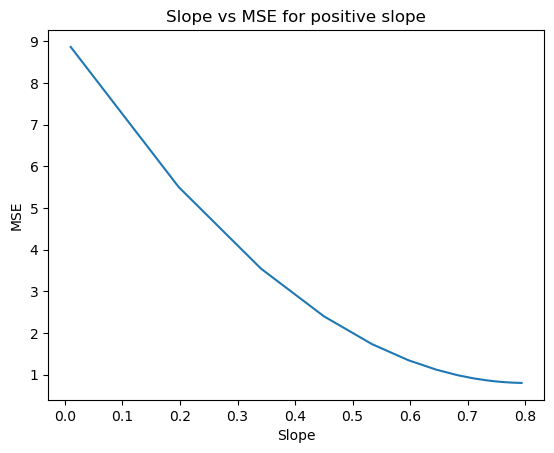

In [319]:
plt.plot(pos_slopes,pos_errors)
plt.title("Slope vs MSE for positive slope")
plt.xlabel('Slope')
plt.ylabel('MSE')
plt.show()

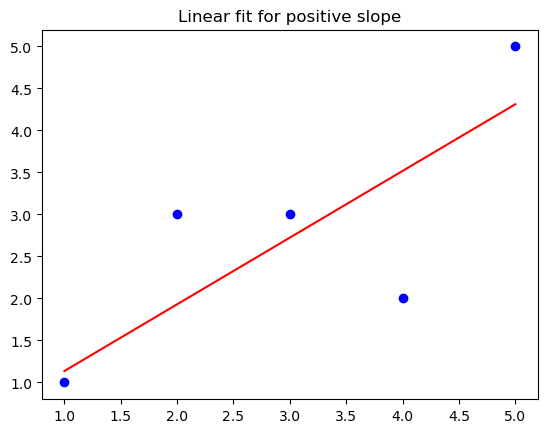

In [320]:
plt.scatter(x_pos,y_pos,color='b')
plt.plot(x_pos,pos_y_pred,color='r')
plt.title("Linear fit for positive slope")
plt.show()

In [321]:
# negative slope
x_neg = np.array([1,2,3,4,5])
y_neg = np.array([10,8,6,4,2])
neg_errors,neg_slopes,neg_y_pred = gradient_descent(500,0.01,0.1,-0.1,x_neg,y_neg)
neg_errors

[45.660000000000004,
 36.560176,
 31.190069593600004,
 27.99391144938496,
 26.065073160696976,
 24.875213535667903,
 24.116438463983812,
 23.609319501240673,
 23.24929165346543,
 22.975416659466916,
 22.752179778080954,
 22.55888185682293,
 22.383457554528157,
 22.218872907413175,
 22.061026008788556,
 21.90752362899484,
 21.756968289936264,
 21.608542807284152,
 21.461768182112372,
 21.316362512000715,
 21.172158771283943,
 21.029056897325273,
 20.88699586864353,
 20.745937433303563,
 20.605856626504288,
 20.46673624457577,
 20.328563624576464,
 20.19132876748094,
 20.055023244346394,
 19.919639558761254,
 19.785170775193258,
 19.651610302291303,
 19.51895176648754,
 19.387188938222724,
 19.25631568883863,
 19.12632596534244,
 18.997213775586822,
 18.868973179520566,
 18.74159828397753,
 18.615083239528374,
 18.48942223853508,
 18.364609513907162,
 18.240639338267524,
 18.117506023357848,
 17.995203919584135,
 17.87372741564485,
 17.753070938207763,
 17.633228951615994,
 17.5141959576

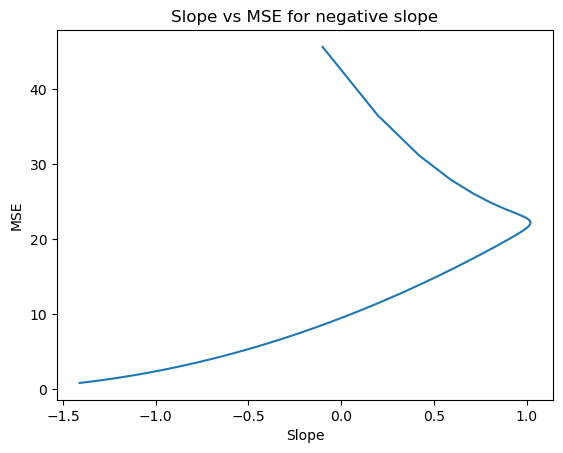

In [322]:
plt.plot(neg_slopes,neg_errors)
plt.title("Slope vs MSE for negative slope")
plt.xlabel('Slope')
plt.ylabel('MSE')
plt.show()

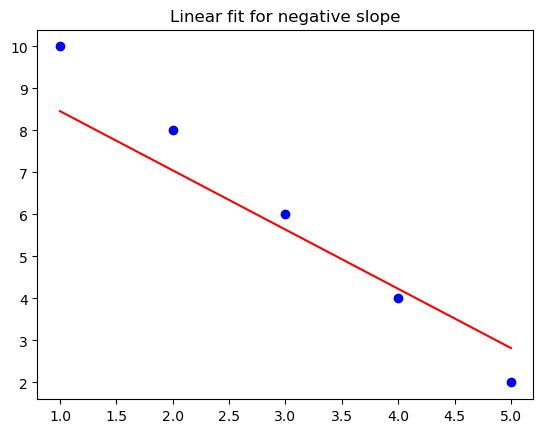

In [323]:
plt.scatter(x_neg,y_neg,color='b')
plt.plot(x_neg,neg_y_pred,color='r')
plt.title("Linear fit for negative slope")
plt.show()